# Introduction to Data Science - Lab 5
*CS 5963 / MATH 3900, University of Utah, http://datasciencecourse.net/*

### Guest Lecturer 
Shirley Zhao  
Data Science Librarian  
Spencer S. Eccles Health Sciences Library  
[shirley.zhao@utah.edu](mailto:shirley.zhao@utah.edu?subject=Python dataviz question)  
[@zhao_shirley](https://twitter.com/zhao_shirley)

## Learning Objectives
By the end of this lab, you will be able to
* explain basic data visualization principles;
* choose plot types appropriate to your visualization objective;
* and use *ggplot* to enhance plot presentation. 

---
# Why Data Visualization

Here are some reasons: 
* tell stories with data
* understand patterns in data "noise"
* discover outliers 
* provide a high level overview

What are some other reasons? 

---
# Basic Data Visualization Principles
*Acknowledgements: Parts of this section are adapted from presentations by Lisa Federer (NIH) and Helen Bailey (MIT) and this [lifehacker article](http://lifehacker.com/5909501/how-to-choose-the-best-chart-for-your-data).*

Let's first critique this graphic.

![nbc_bar_chart](http://65.media.tumblr.com/1aafa5ea09a50e7ee2f31bc874a7f209/tumblr_obyucjB3Vm1sgh0voo1_1280.jpg)
From http://viz.wtf/post/149087683644/fox-news-finally-has-some-competition

## A quote from Ben Fry in his book "Visualizing Data"
<font color='green'>“Visualizing data is just like any other type of communication: success is defined by your audience’s ability to pick up on, and be excited about, your insight.” </font>

## Getting Started
**What is your message?** What are you trying to convey about the data (relationship, comparison, composition, distribution)? 

![chart_chooser](https://c3.staticflickr.com/4/3077/3196386402_01d8d12017_b.jpg)
From https://flic.kr/p/5Ssjjo

If your data includes geographical data, another chart type to consider is geospatial ([example](http://www.ospo.noaa.gov/Products/ocean/sst/contour/)). 

## Design Elements 
* **Line**: passage of time ([example](http://www.nytimes.com/interactive/2015/06/04/us/politics/stacking-up-the-presidential-fields.html)), relationships ([example](https://www.popchartlab.com/products/the-magnificent-multitude-of-beer))
* **Shape**: abstraction ([example](https://www.behance.net/gallery/23043539/Dog-Breeds)), symbols as categories ([example](http://www.informationisbeautiful.net/visualizations/best-in-show-whats-the-top-data-dog/))
* **Value** (amount of black): emphasis ([example](http://visual.ly/light-dark-places)), mood ([example](http://infogr8.com/infographics/mills-boon-summer-reading/))
* **Color**: mood ([example 1](http://www.carlyjamison.com/2012/08/05/color-theory-wheel/), [example 2](http://www.informationisbeautiful.net/visualizations/colours-in-cultures/)), schemes and palettes ([ColorBrewer](http://colorbrewer2.org/)), accessibility ([Vischeck](http://www.vischeck.com/vischeck/))
* **Texture**: difference ([example](http://apps.washingtonpost.com/f/beards/))
* **Typography**: serif vs san serif ([example](https://superdevresources.com/making-font-combinations-that-work-infographics/))

![viz_prop_table](http://complexdiagrams.com/wp-content/2012/01/VisualPropertiesTable2.gif)
From http://complexdiagrams.com/properties

## Design Principles
* **Unity** ([example](http://news.nationalpost.com/news/graphics/graphic-stopping-the-dead-a-statistical-look-back-at-the-walking-dead-series-so-far))
* **Balance**: symmetrical ([example](http://flowingdata.com/2011/02/07/annual-feltron-report-is-up-this-time-with-dad/)) vs asymmetrical ([example](https://www.visualnews.com/2011/04/29/are-all-size-8s-the-same-dress-sizes-demystified/))
* **Heirarchy** ([example](http://flowingdata.com/2009/10/20/how-much-do-ceos-make-in-the-united-states/))
* **Repetition** ([example 1](http://www.nytimes.com/interactive/2015/09/14/world/middleeast/syria-war-deaths.html), [example 2](http://www.juiceanalytics.com/writing/better-know-visualization-small-multiples))
* **Proximity** ([example](http://zoom.it/l3dq))

See also **[Gestalt Principles](http://graphicdesign.spokanefalls.edu/tutorials/process/gestaltprinciples/gestaltprinc.htm)**: similarity, continuation, closure, proximity, figure & ground

## Design Practices
* Be consistent
* Scale & label axes correctly
* Keep it simple
* Present complete & accurate information
* Provide metadata & provenance
* Think reproducibility! 

---
# Break for Questions? 

---
# About *ggplot*
Visit the [developers' github](https://github.com/yhat/ggplot) for current information about the *ggplot* package.

*ggplot* is a Python implementation of The Grammar of Graphics ([eBook available through the Libraries](http://link.springer.com.ezproxy.lib.utah.edu/book/10.1007%2F0-387-28695-0)) and R's [ggplot2](http://ggplot2.org/) package. You may also find it helpful to read Hadley Wickham's [A Layered Grammer of Graphics](http://www.jstor.org.ezproxy.lib.utah.edu/stable/25651297) to understand the motivation behind the R ggplot2 package. 

## Installation
Copy and paste or type the following line in your Anaconda Prompt: ``` conda install -c conda-forge ggplot```

## Reading in Data
*ggplot* is designed to work well with pandas DataFrames. Let's load it and read in the CSV file from last week: [hit_albums.csv](hit_albums.csv).

In [1]:
import pandas as pd
hit_albums = pd.read_csv("hit_albums.csv")
hit_albums.head(8)

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,Thriller,1982,"Pop, rock, R&B",45.4,65.0
1,AC/DC,Back in Black,1980,Hard rock,25.9,50.0
2,Pink Floyd,The Dark Side of the Moon,1973,Progressive rock,22.7,45.0
3,Whitney Houston / Various artists,The Bodyguard,1992,"Soundtrack/R&B, soul, pop",27.4,44.0
4,Meat Loaf,Bat Out of Hell,1977,"Hard rock, progressive rock",20.6,43.0
5,Eagles,Their Greatest Hits (1971–1975),1976,"Rock, soft rock, folk rock",32.2,42.0
6,Bee Gees / Various artists,Saturday Night Fever,1977,Disco,19.0,40.0
7,Fleetwood Mac,Rumours,1977,Soft rock,27.9,40.0


### Slicing and Creating new DataFrames

In [2]:
# first we create a new slice of the dataset
artists_sales = hit_albums[["Artist","Certified sales (millions)"]]
# then we group by Artist, then sum the values up
# as_index is set to False to prevent group labels from returning as the index; we will need this for plotting.
aggregated = artists_sales.groupby("Artist", as_index=False).sum()
top_aggregated = aggregated.sort_values("Certified sales (millions)", ascending=False).head(5)
top_aggregated.head()

,Artist,Certified sales (millions)
33,Michael Jackson,123.3
43,Shania Twain,69.6
29,Madonna,69.4
53,Various artists,65.9
18,Eagles,53.7


## Built-in Plotting (from last week)

Recall DataFrames have built-in plotting capabilities based on the [matplotlib](http://matplotlib.org/) library. Let's have a look at where you left off last week. First, we have to import the *matplotlib* library, and tell Jupyter to display the images directly here:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

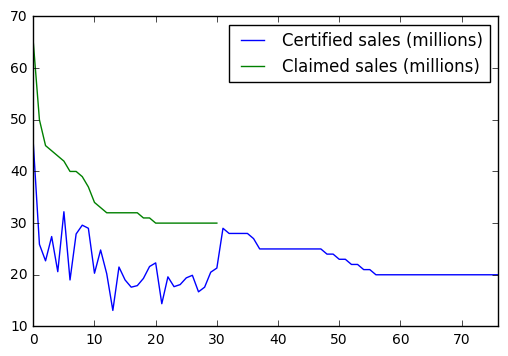

In [4]:
hit_albums[["Certified sales (millions)", "Claimed sales (millions)"]].plot()

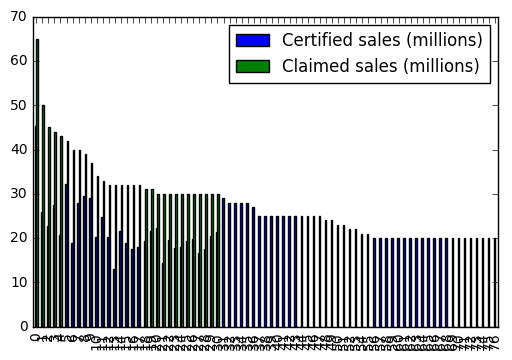

In [5]:
hit_albums[["Certified sales (millions)", "Claimed sales (millions)"]].plot(kind="bar")

## Plotting with *ggplot*
Now let's import *ggplot*. We will use the syntax  ```  from X import *   ``` to import all names from X and save on typing. In general using this syntax is frowned upon (see [section 6.1](https://docs.python.org/3/tutorial/modules.html) in the documentation for more details). 

In [6]:
from ggplot import *

A basic **ggplot** consists of 

- **data** (as a data frame)
- **aes**thetics (how data is represented visually) with x, y, color, size, shape, etc.
- **geom**etric object such as points, lines, histogram, boxplot, etc.

and optional modifications (e.g. **theme**). 

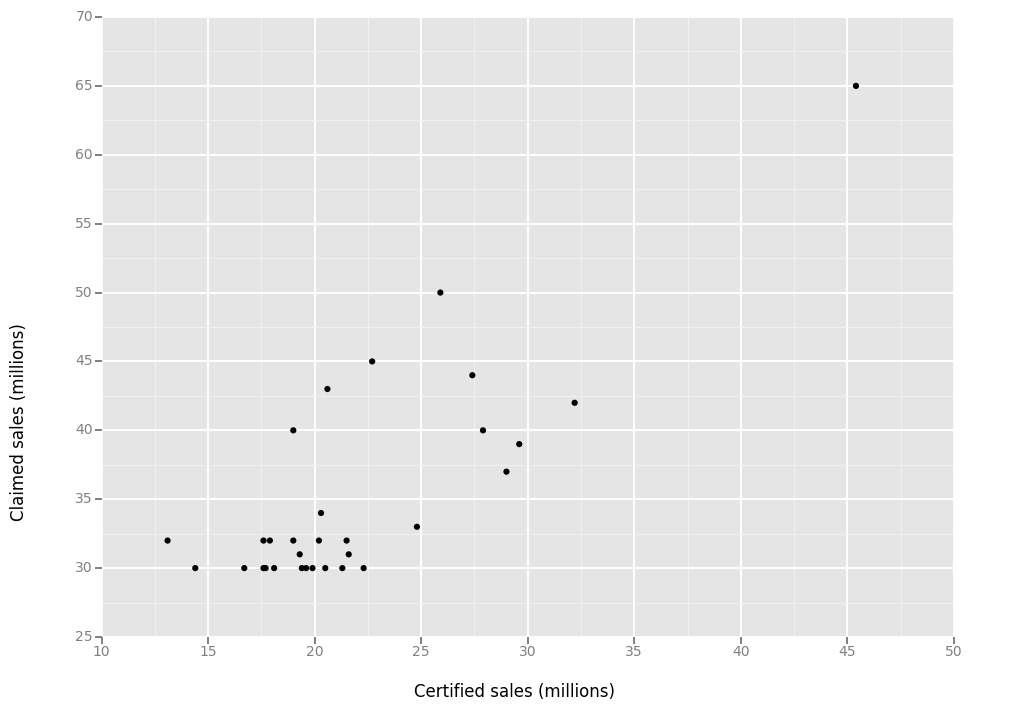

<ggplot: (-9223372036558135990)>

In [7]:
ggplot(hit_albums, aes(x="Certified sales (millions)", y="Claimed sales (millions)")) + geom_point()

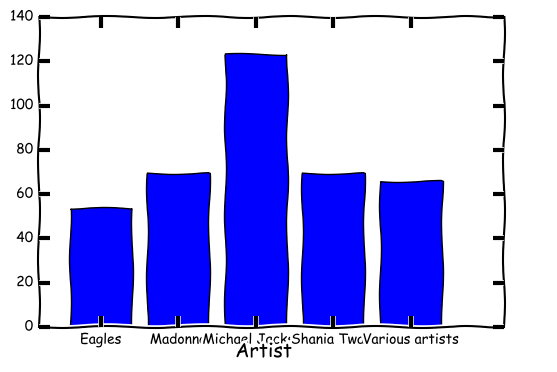

<ggplot: (275306567)>

In [8]:
p = ggplot(top_aggregated, aes(x="Artist", weight="Certified sales (millions)")) + geom_bar() + theme_xkcd()
p

## Exercise
Create new DataFrames and plot that data using *ggplot*.
* Plot the aggregate sum of all certified sales for each year.
* Find artists with exactly 3 hit albums and for each artist, plot his/her album's release date against its certified sales. 

---
# Further Exploration into Data Visualization
**Books**
* Börner, Katy and Polley, David E. (2014). Visual Insights: A Practical Guide to Making Sense of Data. [eBook available](http://site.ebrary.com.ezproxy.lib.utah.edu/lib/utah/reader.action?docID=10829849).
* Cairo, Alberto (2013). The Functional Art: An Introduction to Information Graphics and Visualization.
* Steele, Julie & Iliinsky, Noah (2010). Beautiful Visualization: Looking at Data through the Eyes of Experts.
* Tufte, Edward 
    - (1983). The Visual Display of Quantitative Information.
    - (1990). Envisioning Information.
    - (1997). Visual Explanations: Images and Quantities, Evidence and Narrative.
    - (2006). Beautiful Evidence. 
* Wong, Dona (2014). The Wall Street Journal Guide to Information Graphics: The Dos and Don'ts of Presenting Data, Facts, and Figures. 


**Links**
* [10 Useful Python Data Visualization Libraries for Any Discipline](https://blog.modeanalytics.com/python-data-visualization-libraries/) 
* [Choose the Right Chart Type for Your Data diagram](http://www.labnol.org/software/findright-chart-type-for-your-data/6523/)
* [ColorBrewer 2.0](http://colorbrewer2.org/)
* [ColorLab Colorblindness Simulator](http://colorlab.wickline.org/colorblind/colorlab/)
* [I Want Hue color palette generator](http://tools.medialab.sciences-po.fr/iwanthue/)
* [The Functional Art](http://www.thefunctionalart.com/)
* [Junk Charts](http://junkcharts.typepad.com/junk_charts/)

**Local Group**
* [Salt Lake City Data Science Meetup](http://www.meetup.com/Salt-Lake-City-Data-Science/)